In [2]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import shutil
import PIL
import numpy as np
from keras.optimizers import SGD
from keras import optimizers
import keras

In [6]:
training_data_gen = ImageDataGenerator(validation_split=0.1)

In [7]:
train = training_data_gen.flow_from_directory('D:\harsh\FireDetection\DATA\image\Image',color_mode='rgb',class_mode='binary',
                                              batch_size=16,subset='training')
validation = training_data_gen.flow_from_directory('D:\harsh\FireDetection\DATA\image\Image',color_mode='rgb',class_mode='binary',
                                              batch_size=16,subset='validation')

Found 34967 images belonging to 2 classes.
Found 3885 images belonging to 2 classes.


## CNN

In [64]:
#Initializing CNN
cnn=tf.keras.models.Sequential()

#Adding first layers
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[256,256,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

#Adding second layer
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

#Adding third layer
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

#Flattening
cnn.add(tf.keras.layers.Flatten())

#Fully connected layer
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

#Output layer
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [63]:
cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 128)      0

## Training 

In [61]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

cnn.compile( loss = "binary_crossentropy", 
               optimizer = sgd, 
               metrics=['accuracy']
             )

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 96)        34944     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 96)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 384)         2457984   
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 3, 3, 384)       

In [1]:
cnn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

cnn.fit(train,validation_data=validation,epochs=5,steps_per_epoch=train.samples//16,
                 validation_steps=validation.samples//16,callbacks=callbacks)


'cnn.fit(train,validation_data=validation,epochs=5,steps_per_epoch=train.samples//16,\n                 validation_steps=validation.samples//16,callbacks=callbacks)'

## Saving And Loading

In [162]:
cnn.save('D:\harsh\FireDetection\model_v-1')
cnn = keras.models.load_model('D:\harsh\FireDetection\model_v-1')

INFO:tensorflow:Assets written to: D:\harsh\FireDetection\model_v-1\assets


INFO:tensorflow:Assets written to: D:\harsh\FireDetection\model_v-1\assets


## Testing  

In [345]:
test_image = image.load_img(r'D:\harsh\FireDetection\DATA\image\Image\Not_Fire\Img_28105.jpg',target_size=(256,256))

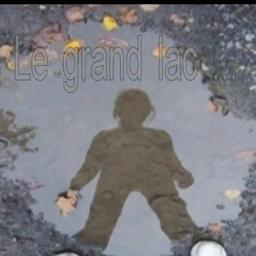

In [346]:
test_image

In [347]:
test_image = image.img_to_array(test_image)

In [348]:
test_image=test_image/255

In [349]:
test_image = np.expand_dims(test_image,axis=0)

In [350]:
result = cnn.predict(test_image)

1/1 [==============================] - 0s 19ms/step


In [351]:
result

array([[0.51162994]], dtype=float32)

In [352]:
if result>0.51:
    print(" fire ")
else :
    print("NOT Fire")

 fire 


In [315]:
result[0][0]

0.5070491

In [172]:
tf.test.is_gpu_available()

False